In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#save file path to Variable 
us_file ="US_Merged_data.csv"
gb_file ="GB_Merged_data.csv"
# ca_file ="CA_Merged_data.csv"
ind_file ="IN_Merged_data.csv"

#Read the CSV into Pandas Dataframe 
us_youtube_df = pd.read_csv(us_file)
gb_youtube_df = pd.read_csv(gb_file)
# ca_youtube_df = pd.read_csv(ca_file)
ind_youtube_df = pd.read_csv(ind_file)

us_youtube_df['country']='US' 
gb_youtube_df['country']= 'GB'
# ca_youtube_df['country']= 'CA'
ind_youtube_df['country']= 'IND'


df_cleaned_us = us_youtube_df[['video_id','view_count','likes','dislikes','comment_count','trending_date','categoryId','categoryName','country']].sort_values(['video_id','trending_date','view_count'],ascending=False).drop_duplicates(subset="video_id")
df_cleaned_gb = gb_youtube_df[['video_id','view_count','likes','dislikes','comment_count','trending_date','categoryId','categoryName','country']].sort_values(['video_id','trending_date','view_count'],ascending=False).drop_duplicates(subset="video_id")
df_cleaned_ind = ind_youtube_df[['video_id','view_count','likes','dislikes','comment_count','trending_date','categoryId','categoryName','country']].sort_values(['video_id','trending_date','view_count'],ascending=False).drop_duplicates(subset="video_id")


#df_cleaned_ind.shape
frames = [df_cleaned_us, df_cleaned_gb,df_cleaned_ind]

youtube_df = pd.concat(frames)


youtube_df.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(57453, 9)

In [3]:
youtube_df[youtube_df['country'] == 'US'].head(1)


,video_id,view_count,likes,dislikes,comment_count,trending_date,categoryId,categoryName,country
9030,zzk09ESX7e0,9137783.0,567021.0,3304.0,75379.0,2021-06-08T00:00:00Z,10,Music,US


In [4]:
youtube_df[youtube_df['country'] == 'GB'].head(1)

,video_id,view_count,likes,dislikes,comment_count,trending_date,categoryId,categoryName,country
67239,zzxPZwaA-8w,2144129.0,32744.0,823.0,2037.0,2021-05-30T00:00:00Z,17,Sports,GB


In [5]:
youtube_df[youtube_df['country'] == 'IND'].head(1)

,video_id,view_count,likes,dislikes,comment_count,trending_date,categoryId,categoryName,country
29848,zzYIDcNggBM,763130.0,49953.0,707.0,1730.0,2021-08-30T00:00:00Z,24,Entertainment,IND


In [6]:
# Rename the headers to be more explanatory
renamed_df = youtube_df.rename(columns={"video_id": "Video ID",
                                        "view_count": "View Count",
                                        "likes":"Likes",
                                        "dislikes": "Dislikes",
                                        "comment_count": "Comment Count",
                                        "trending_date": "Trending Date",
                                        "categoryId": "Category ID",
                                        "categoryName": "Category Name",
                                       "country":"Country"})
renamed_df.head()

,Video ID,View Count,Likes,Dislikes,Comment Count,Trending Date,Category ID,Category Name,Country
9030,zzk09ESX7e0,9137783.0,567021.0,3304.0,75379.0,2021-06-08T00:00:00Z,10,Music,US
6159,zzd4ydafGR0,13974461.0,728439.0,7579.0,57012.0,2021-02-21T00:00:00Z,10,Music,US
62915,zzEblS1lEvU,171649.0,2552.0,71.0,245.0,2021-01-04T00:00:00Z,17,Sports,US
31466,zyrJ0j7x9-4,1243504.0,41623.0,1476.0,4911.0,2020-08-30T00:00:00Z,20,Gaming,US
11521,zyebS_kRoEc,1786638.0,160552.0,2359.0,2023.0,2021-09-07T00:00:00Z,10,Music,US


In [7]:
countryGroup = renamed_df.groupby(["Country"])

#adding all categories values together: 
countrySum_df=countryGroup.sum()
#Resetting index
countrySum_df = countrySum_df.reset_index()
countrySum_df

,Country,View Count,Likes,Dislikes,Comment Count,Category ID
0,GB,4.380357e+10,2.199518e+09,49675610.0,192773068.0,323547
1,IND,6.091092e+10,2.714492e+09,108523554.0,222103117.0,507461
2,US,5.152717e+10,2.598037e+09,58916917.0,212047622.0,323162


In [8]:
#dropping categories for bar graph: 
country_dropped = countrySum_df.drop(columns=['Category ID','View Count'])

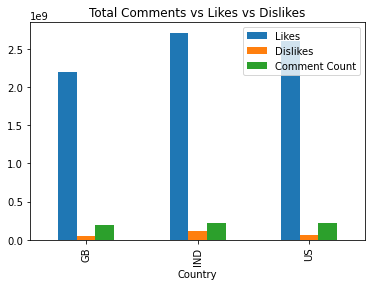

In [9]:
country_dropped.plot(x='Country',
        kind='bar',
        stacked=False,
        title='Total Comments vs Likes vs Dislikes')
plt.legend(loc="best")




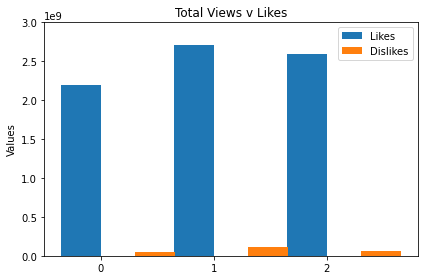

In [10]:
# setting up Bar plot:

labels = countrySum_df.index
likes =countrySum_df['Likes']
dislikes = countrySum_df['Dislikes']
#view_count = countrySum_df['View Count']
comment_count = countrySum_df['Comment Count']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, likes, width, label='Likes')
rects2 = ax.bar(x + width+0.13 , dislikes, width, label='Dislikes')
#rects3 = ax.bar(x + width/2, view_count, width, label='View Count')
#rects4 = ax.bar(x + width/2, comment_count, width, label='Comment Count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Total Views v Likes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim([0,3000000000])
fig.tight_layout()

plt.show()

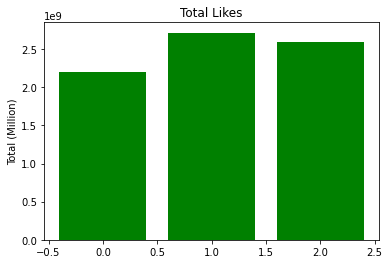

In [11]:
#Setting a bar plot for total of likes: 
plt.bar(countrySum_df.index.values,countrySum_df['Likes'],color="Green")

plt.ylabel("Total (Million)")
plt.xlabel("")
plt.title("Total Likes")
#plt.grid()
plt.show()

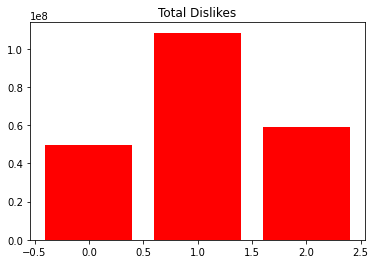

In [12]:
#Setting a bar plot for total of likes: 
plt.bar(countrySum_df.index.values,countrySum_df['Dislikes'],color="red")

plt.ylabel("")
plt.xlabel("")
plt.title("Total Dislikes")
#plt.grid()
plt.show()

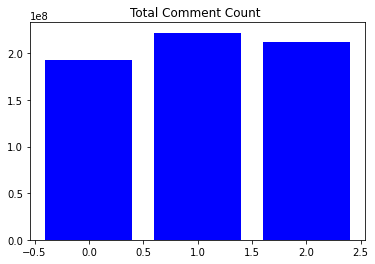

In [13]:
#Setting a bar plot for total of likes: 

plt.bar(countrySum_df.index.values,countrySum_df['Comment Count'],color="blue")

plt.ylabel("")
plt.xlabel("")
plt.title("Total Comment Count ")
#plt.grid()
plt.show()

In [14]:
#Setting up a group by to assess data by category: 
categorya =renamed_df.groupby(["Category Name","Country"])
categorya_df=categorya.sum()

categorya2_df = categorya_df.reset_index()

categorya2_df.head(20)

,Category Name,Country,View Count,Likes,Dislikes,Comment Count,Category ID
0,Autos & Vehicles,GB,4.065066e+08,16625522.0,314123.0,1337544.0,632
1,Autos & Vehicles,IND,1.821003e+08,9673667.0,294638.0,250555.0,270
2,Autos & Vehicles,US,4.651076e+08,17759393.0,380428.0,1429100.0,716
3,Comedy,GB,1.780955e+09,101131843.0,2215682.0,5521380.0,18515
4,Comedy,IND,3.205963e+09,229713963.0,5995624.0,12413635.0,34592
5,Comedy,US,2.743370e+09,162819948.0,3633282.0,7567147.0,23460
6,Education,GB,7.515574e+08,35792544.0,761854.0,2415545.0,8883
7,Education,IND,7.840522e+08,35535333.0,1270704.0,2444347.0,15849
8,Education,US,8.487432e+08,41503343.0,803976.0,2728246.0,11556
9,Entertainment,GB,1.017995e+10,484774263.0,10933280.0,31551735.0,89856


In [15]:
#Setting up a dataframe to make a bar graph of all countries data

gb = categorya2_df[categorya2_df['Country'] == 'GB']
gb_likes = pd.DataFrame(gb[['Category Name','Likes']])
gb_likes = gb_likes.rename(columns={"Likes": "GB"})
#gb_likes = gb_likes.reset_index()

ind = categorya2_df[categorya2_df['Country'] == 'IND']
ind_likes = pd.DataFrame(ind[['Category Name','Likes']])
ind_likes = ind_likes.rename(columns={"Likes": "IND"})
#ind_likes = ind_likes.reset_index()

us = categorya2_df[categorya2_df['Country'] == 'US']
us_likes = pd.DataFrame(us[['Category Name','Likes']])
us_likes = us_likes.rename(columns={"Likes": "US"})
#us_likes = us_likes.reset_index()

concatlikes_df = pd.merge(gb_likes, ind_likes, on=["Category Name"])
concatlikes_df = pd.merge(concatlikes_df, us_likes, on=["Category Name"])
#concatlikes_df[['Category Name','IND']]
gb_likes.shape

(16, 2)

In [16]:
#Setting up a dataframe to make a bar graph of all countries data

gb = categorya2_df[categorya2_df['Country'] == 'GB']
gb_Dislikes = pd.DataFrame(gb[['Category Name','Dislikes']])
gb_Dislikes = gb_Dislikes.rename(columns={"Dislikes": "GB"})
#gb_likes = gb_likes.reset_index()

ind = categorya2_df[categorya2_df['Country'] == 'IND']
ind_Dislikes = pd.DataFrame(ind[['Category Name','Dislikes']])
ind_Dislikes = ind_Dislikes.rename(columns={"Dislikes": "IND"})
#ind_likes = ind_likes.reset_index()

us = categorya2_df[categorya2_df['Country'] == 'US']
us_Dislikes = pd.DataFrame(us[['Category Name','Dislikes']])
us_Dislikes = us_Dislikes.rename(columns={"Dislikes": "US"})
#us_likes = us_likes.reset_index()

concat_df = pd.merge(gb_Dislikes,ind_Dislikes, on=["Category Name"])
concat_df = pd.merge(concat_df, us_Dislikes, on=["Category Name"])
concat_df.head(20)

,Category Name,GB,IND,US
0,Autos & Vehicles,314123.0,294638.0,380428.0
1,Comedy,2215682.0,5995624.0,3633282.0
2,Education,761854.0,1270704.0,803976.0
3,Entertainment,10933280.0,42635220.0,13084335.0
4,Film & Animation,1076444.0,3068776.0,1087812.0
5,Gaming,5629740.0,3397928.0,6643562.0
6,Howto & Style,1180737.0,1824085.0,1731808.0
7,Music,15113442.0,30205188.0,17535171.0
8,News & Politics,1300563.0,3074948.0,1268118.0
9,Nonprofits & Activism,15719.0,13501.0,31198.0


<AxesSubplot:title={'center':'Total Likes Per Category'}, xlabel='Category Name'>

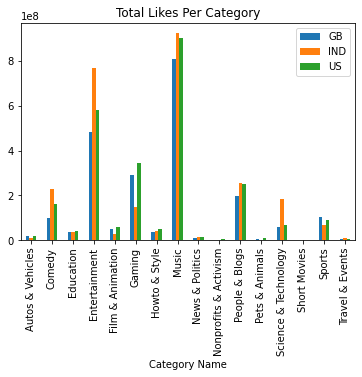

In [17]:
#Setting Bar graph
concatlikes_df.plot(x='Category Name',
        kind='bar',
        stacked=False,
        title='Total Likes Per Category')

<AxesSubplot:title={'center':'Total Dislikes Per Category'}, xlabel='Category Name'>

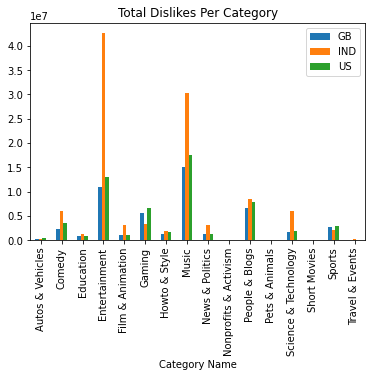

In [18]:
#Setting Bar graph
concat_df.plot(x='Category Name',
        kind='bar',
        stacked=False,
        title='Total Dislikes Per Category')

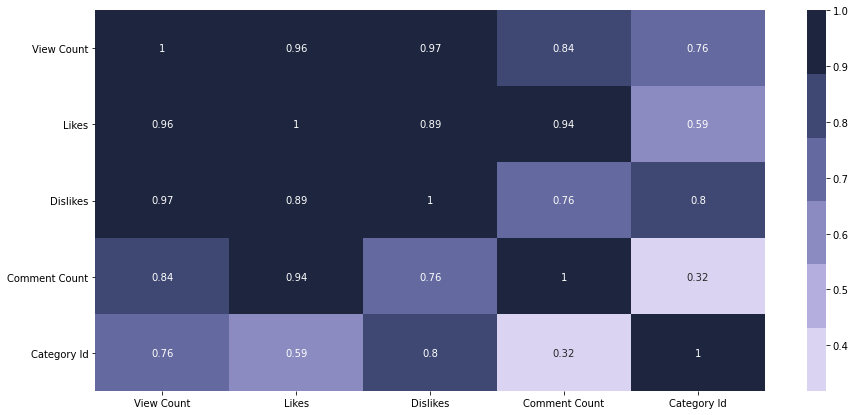

In [19]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(categorya2_df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(15,7))
_ = sns.heatmap(categorya2_df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(start=2.8, rot=.1))


#Youtube Trending video analysis:

#This shows how and if the variables in a dataset correlate/relationship with one another.The table on the right show has a scale of 
 #  0.4being the lowest correlation  to 1.0 being the strongest correlation to another. We can see that views and likes  are strongly correlated to one another.
    
